In [1]:
import glob
import os
import re
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../processed_data/train_v5.csv')
test = pd.read_csv('../processed_data/test_v5.csv')

In [3]:
use_col = ['age', 'area', 'floor', 'structure', 'max_floor', 'room_num', 'L', 'D',
                'K', 'S', 'north', 'min_time', 'avg_time', 'bicycle_parking','car_parking','bike_parking','23ku_mean_std',
                'direction_countall']

In [4]:
train.groupby(by='age')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
age,,,,,,,,
0,1593.0,121640.979284,45331.174848,51000.0,94500.0,108500.0,139000.0,600000.0
1,983.0,126986.266531,44069.169671,50000.0,102250.0,116500.0,138750.0,480000.0
2,644.0,136382.142857,50502.747791,51000.0,101375.0,127750.0,166000.0,395000.0
3,508.0,148612.795276,52008.898245,49000.0,113000.0,131500.0,196250.0,325000.0
4,323.0,149027.863777,61656.991695,45000.0,108250.0,142000.0,170000.0,500000.0
...,...,...,...,...,...,...,...,...
847,1.0,28500.000000,NaN,28500.0,28500.0,28500.0,28500.0,28500.0
955,1.0,42500.000000,NaN,42500.0,42500.0,42500.0,42500.0,42500.0
1433,1.0,52000.000000,NaN,52000.0,52000.0,52000.0,52000.0,52000.0


In [5]:
train.groupby(by='car_parking')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
car_parking,,,,,,,,
0,19105.0,107092.213975,61473.139324,25000.0,71000.0,93000.0,124000.0,1660000.0
1,392.0,247097.066327,181525.212675,45000.0,145000.0,210000.0,261000.0,1450000.0
2,11973.0,131941.630753,79122.196711,26000.0,87000.0,114000.0,154000.0,2500000.0


In [6]:
train.groupby(by='bicycle_parking')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
bicycle_parking,,,,,,,,
0,14953.0,108408.187120,77264.525155,25000.0,68500.0,90000.0,123000.0,2500000.0
1,16162.0,127233.468692,69399.708095,30000.0,85000.0,110000.0,148000.0,1390000.0
2,355.0,127383.098592,60060.442686,42000.0,89250.0,109500.0,151000.0,500000.0


In [7]:
train.groupby(by='bike_parking')['y'].describe()

,count,mean,std,min,25%,50%,75%,max
bike_parking,,,,,,,,
0,13511.0,111427.532899,76422.289881,25000.0,71000.0,93500.0,129000.0,2500000.0
1,17959.0,123453.340721,71239.439357,26000.0,81000.0,106000.0,142000.0,1390000.0


### bath_toiletの前処理

In [8]:
bt = pd.concat([train['bath_toilet'],test['bath_toilet']])

In [9]:
bt

0         専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座
1                                    専用トイレ／\tシャワー／\t温水洗浄便座
2        専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...
3           専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立
4                     専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能
                               ...                        
31257    専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...
31258                          専用バス／\t専用トイレ／\tシャワー／\t浴室乾燥機
31259                       バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座
31260    専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t浴室乾燥機\t...
31261     専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座
Name: bath_toilet, Length: 62732, dtype: object

In [10]:
train[train['bath_toilet'].isnull()]

,id,y,location,access,layout,age,direction,area,floor,bath_toilet,...,north,walk_time,min_time,avg_time,bicycle_parking,car_parking,bike_parking,23ku,23ku_mean_std,direction_countall
139,140,115000,東京都墨田区亀沢１丁目,都営大江戸線\t両国(都営線)駅\t徒歩3分\t\t総武線・中央線（各停）\t両国駅\t徒歩...,1K,73,西,25.00,5,NaN,...,0,"[3, 7, 13]",3,7.666667,0,0,0,墨田区,-0.200082,8087
148,149,35500,東京都豊島区駒込３丁目,山手線\t駒込駅\t徒歩3分\t\t山手線\t巣鴨駅\t徒歩10分\t\t京浜東北線\t上中...,1R,644,NaN,15.70,1,NaN,...,0,"[3, 10, 16]",3,9.666667,0,0,1,豊島区,-0.354067,5557
226,227,27000,東京都中野区上高田２丁目,中央線（快速）\t中野(東京都)駅\t徒歩12分\t\t西武新宿線\t新井薬師前駅\t徒歩8...,1K,535,西,18.00,1,NaN,...,0,"[12, 8, 16]",8,12.000000,0,0,0,中野区,-0.626183,8087
250,251,55000,東京都大田区南馬込６丁目,都営浅草線\t西馬込駅\t徒歩8分\t\t東急池上線\t池上駅\t徒歩24分\t\t都営浅草...,1K,401,東,19.88,2,NaN,...,0,"[8, 24, 22]",8,18.000000,0,0,1,大田区,-0.468736,9943
520,521,72000,東京都品川区南大井５丁目,京浜東北線\t大森(東京都)駅\t徒歩8分\t\t京急本線\t立会川駅\t徒歩12分\t\t...,1R,337,南,20.28,5,NaN,...,0,"[8, 12, 13]",8,11.000000,1,0,0,品川区,0.044923,17697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,31044,142000,東京都港区麻布台2-,日比谷線\t神谷町駅\t徒歩5分\t\t都営大江戸線\t赤羽橋駅\t徒歩7分\t\t都営大江...,1K,219,南西,24.66,12,NaN,...,0,"[5, 7, 13]",5,8.333333,0,0,0,港区,2.651488,6122
31085,31086,38000,東京都杉並区桃井４丁目,中央線（快速）\t西荻窪駅\t徒歩14分,1R,475,東,16.50,2,NaN,...,0,[14],14,14.000000,0,0,0,杉並区,-0.738958,9943
31097,31098,57000,東京都大田区仲六郷１丁目,京浜東北線\t蒲田駅\t徒歩17分\t\t京急本線\t雑色駅\t徒歩6分\t\t京急本線\t...,1K,379,南,12.96,2,NaN,...,0,"[17, 6, 19]",6,14.000000,0,0,0,大田区,-0.468736,17697
31144,31145,44000,東京都杉並区堀ノ内３丁目,丸ノ内線(池袋－荻窪)\t新高円寺駅\t徒歩13分\t\t丸ノ内線(池袋－荻窪)\t東高円寺...,1K,475,南東,16.00,1,NaN,...,0,"[13, 18]",13,15.500000,0,0,1,杉並区,-0.738958,6150


In [11]:
# 要素を見る
val = []
for e in bt.fillna('無し'):
    split_e = e.split('\t')
    for v in split_e:
        val.append(v)

In [12]:
set(val)

{'シャワー',
 'シャワー／',
 'トイレなし',
 'バスなし',
 'バスなし／',
 'バス・トイレ別',
 'バス・トイレ別／',
 '共同トイレ',
 '共同トイレ／',
 '共同バス／',
 '専用トイレ',
 '専用トイレ／',
 '専用バス',
 '専用バス／',
 '洗面台独立',
 '洗面台独立／',
 '浴室乾燥機',
 '温水洗浄便座',
 '温水洗浄便座／',
 '無し',
 '脱衣所',
 '追焚機能',
 '追焚機能／',
 '／'}

In [13]:
for e in bt.fillna('無し'):
    split_e = e.split('\t')
    if 'シャワー' not in split_e and 'シャワー／' not in split_e :
        print(split_e)

['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '洗面台独立']
['専用トイレ']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['専用バス／', '専用トイレ／', 'バス・トイレ別']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能']
['バス・トイレ別／', '追焚機能／', '浴室乾燥機']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立']
['専用トイレ']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '温水洗浄便座']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['共同トイレ']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座']
['専用トイレ']
['バス・トイレ別／', '洗面台独立／', '脱衣所']
['専用トイレ']
['無し']
['専用バス／', 'バス・トイレ別／', '追焚機能／', '洗面台独立／', '脱衣所']
['無し']
['共同トイレ／', '洗面台独立']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立']
['専用トイレ']
['専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '洗面台独立']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '温水洗浄便座']
['無し']
['専用トイレ／', 'バス・トイレ別／', '温水洗浄便座']
['専用バ

['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['専用バス／', '専用トイレ／', 'バス・トイレ別']
['無し']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '温水洗浄便座／', '洗面台独立']
['バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['専用バス／', '専用トイレ／', 'バス・トイレ別']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '温水洗浄便座']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['専用トイレ']
['バス・トイレ別']
['専用トイレ／', 'バス・トイレ別／', '追焚機能／', '温水洗浄便座／', '洗面台独立']
['無し']
['専用トイレ']
['専用トイレ']
['無し']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座']
['バスなし／', '共同トイレ']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '洗面台独立／', '脱衣所']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '浴室乾燥機', '／', '温水洗浄便座／', '洗面台独立／', '脱衣所']
['専用トイレ']
['専用トイレ']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '浴室乾燥機']
['専用バス／', '専用トイレ／', 'バス・トイレ別／', '追焚機能／', '洗面台独立']
['専

In [14]:
for e in bt.fillna('無し'):
    if 'なし' not in e and '共同' not in e and  '専用' not in e:
        print(e)

バス・トイレ別／	シャワー／	追焚機能
シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
シャワー
シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	追焚機能／	浴室乾燥機
シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	温水洗浄便座
シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	洗面台独立／	脱衣所
バス・トイレ別／	シャワー／	洗面台独立
無し
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
無し
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／

バス・トイレ別／	シャワー
シャワー
バス・トイレ別／	シャワー／	洗面台独立
シャワー
シャワー／	浴室乾燥機
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	追焚機能／	温水洗浄便座／	洗面台独立
シャワー
シャワー
シャワー
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立／	脱衣所
無し
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	追焚機能／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機
バス・トイレ別／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座
バス・トイレ別／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー
シャワー
無し
無し
バス・トイレ別／	洗面台独立
バス・トイレ別／	シ

バス・トイレ別／	シャワー
シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	脱衣所
シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	洗面台独立
無し
バス・トイレ別／	洗面台独立／	脱衣所
無し
シャワー
バス・トイレ別／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	温水洗浄便座
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
無し
バス・トイレ別／	シャワー／	浴室乾燥機	／	脱衣所
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
無し
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
シャワー
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
シャワー
バス・トイレ別／	シャワー／	追焚

バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	浴室乾燥機
バス・トイレ別／	シャワー／	浴室乾燥機	／	洗面台独立
追焚機能
バス・トイレ別／	浴室乾燥機
シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立／	脱衣所
無し
シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
無し
無し
バス・トイレ別／	シャワー
シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
無し
バス・トイレ別／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・ト

バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	シャワー
シャワー
シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー
無し
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	浴室乾燥機	／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座
バス・トイレ別／	シャワー／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
無し
バス・トイレ別／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	追焚機能／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	温水洗浄便座／	洗面台独立
無し
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	シャワー
シャワー／	温水洗浄便座
バス・トイレ別／	追焚機能／	浴室乾燥機	／	洗面台独立
シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別
無し
バス・トイレ別／	シャワー
無し
シャワー
バス・トイレ別／	追焚機能
バス・トイレ

シャワー
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー
バス・トイレ別／	追焚機能／	浴室乾燥機	／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	洗面台独立
バス・トイレ別／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	追焚機能／	洗面台独立
シャワー
無し
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
バス・トイレ別／	シャワー
バス・トイレ別／	追焚機能／	浴室乾燥機	／	洗面台独立／	脱衣所
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
追焚機能
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	シャワー
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	追焚機能／	浴室乾燥機	／	温水洗浄便座
バス・トイレ別／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	温水洗浄便座
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー／	洗面台独立
シャワー／	温水洗浄便座
シャワー
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機
無し
バス・トイレ別／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
バス・トイレ別／	シャワー／	浴室乾燥機	／	温水洗浄便座／	

In [15]:
for e in bt.fillna('無し'):
    if '浴室乾燥' in e and 'バス' not in e:
        print(e)

シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
浴室乾燥機	／	温水洗浄便座
追焚機能／	浴室乾燥機	／	洗面台独立
浴室乾燥機
専用トイレ／	シャワー／	浴室乾燥機	／	温水洗浄便座
専用トイレ／	シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
専用トイレ／	シャワー／	浴室乾燥機
追焚機能／	浴室乾燥機
専用トイレ／	シャワー／	浴室乾燥機	／	温水洗浄便座
浴室乾燥機	／	温水洗浄便座
シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座
浴室乾燥機	／	温水洗浄便座
シャワー／	浴室乾燥機
追焚機能／	浴室乾燥機	／	洗面台独立
追焚機能／	浴室乾燥機	／	温水洗浄便座
シャワー／	浴室乾燥機
シャワー／	浴室乾燥機
シャワー／	追焚機能／	浴室乾燥機
浴室乾燥機	／	温水洗浄便座
シャワー／	浴室乾燥機	／	温水洗浄便座
シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立／	脱衣所
シャワー／	浴室乾燥機
シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
浴室乾燥機	／	温水洗浄便座
専用トイレ／	シャワー／	浴室乾燥機
シャワー／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
専用トイレ／	シャワー／	追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー／	浴室乾燥機
専用トイレ／	シャワー／	浴室乾燥機
専用トイレ／	シャワー／	浴室乾燥機
シャワー／	浴室乾燥機
浴室乾燥機	／	温水洗浄便座
シャワー／	浴室乾燥機
シャワー／	浴室乾燥機	／	温水洗浄便座
シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
シャワー／	浴室乾燥機	／	温水洗浄便座
シャワー／	浴室乾燥機
専用トイレ／	シャワー／	浴室乾燥機	／	温水洗浄便座
シャワー／	浴室乾燥機
浴室乾燥機	／	温水洗浄便座
追焚機能／	浴室乾燥機	／	温水洗浄便座／	洗面台独立
シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
シャワー／	浴室乾燥機
シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
シャワー／	追焚機能／	浴室乾燥機
専用トイレ／	シャワー／	浴室乾燥機
シャワー／	浴室乾燥機
浴室乾燥機
浴室乾燥機	／	温水

In [16]:
for e in bt.fillna('無し'):
    if '温水洗浄便座' not in e and 'トイレ' not in e:
        print(e)

シャワー
専用バス／	シャワー
シャワー
シャワー／	追焚機能／	浴室乾燥機	／	洗面台独立
シャワー
シャワー
シャワー
シャワー
専用バス／	シャワー
無し
無し
シャワー
シャワー
シャワー
無し
専用バス／	シャワー
シャワー
無し
シャワー
専用バス／	シャワー
シャワー
シャワー
専用バス／	シャワー
シャワー
シャワー
シャワー
無し
追焚機能／	浴室乾燥機	／	洗面台独立
シャワー
シャワー
専用バス／	シャワー
シャワー
シャワー
シャワー
シャワー／	脱衣所
シャワー
無し
追焚機能
シャワー
無し
シャワー
無し
浴室乾燥機
シャワー
シャワー／	追焚機能
シャワー
無し
シャワー
無し
無し
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
シャワー
専用バス／	シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
無し
シャワー
シャワー
無し
シャワー
シャワー
シャワー
シャワー
無し
無し
専用バス／	シャワー
シャワー
無し
シャワー
無し
シャワー
シャワー
無し
シャワー
追焚機能／	浴室乾燥機
専用バス
シャワー
無し
専用バス／	シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
シャワー
シャワー／	洗面台独立
シャワー
シャワー
シャワー
無し
シャワー
シャワー
無し
専用バス／	シャワー
無し
無し
無し
シャワー／	追焚機能
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
無し
シャワー
シャワー
無し
無し
シャワー
無し
シャワー
シャワー
無し
専用バス／	シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
無し
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
シャワー
シャワー
無し
無し
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
シャワー
無し
無し
シャワー
無し
無し
シャワー
シャワー
シャワー
シャワー／	洗面台独立
無し
無し
シャワー
シャワー
シャワー
無し
無し
無し
無し
無し
シャワー／	浴室乾燥機
追焚機能／	浴室乾燥機	／	洗面台独立
専用バス／	シャワー
シャワー
シャワー

In [17]:
def processing_toilet(bt):
    '''
    トイレ
    なし：０
    共同：１
    専用：２
    '''
    toilet = []
    for t in bt.fillna(''):
        if 'トイレ' in t or '温水洗浄便座' in t:
            if '共同トイレ' in t:
                toilet.append(1)
            elif '専用トイレ' in t:
                toilet.append(2)
            else:
                toilet.append(2)
        else:
            if t=='':
                toilet.append(2)
            else:
                toilet.append(0)
    
    return toilet

In [18]:
def processing_bath(bt):
    '''
    バス
    なし：０
    シャワー：１
    共同：２
    専用：３
    '''
    bath = []
    for b in bt.fillna(''):
        if 'バス' in b or '浴室乾燥' in b or '追焚機能' in b:
            if '共同バス' in b:
                bath.append(2)
            elif '専用バス' in b:
                bath.append(3)
            else:
                bath.append(3)
        else:
            if 'シャワー' in b or '脱衣所' in b:
                bath.append(1)
            elif b=='':
                bath.append(3)
            else:
                bath.append(0)
    
    return bath

In [19]:
set(processing_bath(train['bath_toilet']))

{0, 1, 2, 3}

In [20]:
train['toilet'] = processing_toilet(train['bath_toilet'])
train['bath'] = processing_bath(train['bath_toilet'])

In [21]:
train.groupby('toilet').describe()['y']

,count,mean,std,min,25%,50%,75%,max
toilet,,,,,,,,
0,1049.0,64035.452812,21186.009400,33000.0,52000.0,60000.0,70000.0,260000.0
1,86.0,53439.883721,38080.457563,25000.0,35000.0,42100.0,52750.0,245000.0
2,30335.0,120350.318873,74194.742334,26200.0,78500.0,103000.0,138000.0,2500000.0


In [22]:
train.groupby('bath').describe()['y']

,count,mean,std,min,25%,50%,75%,max
bath,,,,,,,,
0,171.0,69846.959064,130584.961341,25000.0,38000.0,48200.0,63000.0,1660000.0
1,1226.0,63141.019576,18358.728728,33000.0,53000.0,60000.0,69000.0,260000.0
2,34.0,72838.235294,50901.080626,29000.0,43000.0,52000.0,82250.0,245000.0
3,30039.0,120868.361896,73745.589077,27000.0,79000.0,104000.0,139000.0,2500000.0


In [23]:
train['bath_toilet']

0         専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座
1                                    専用トイレ／\tシャワー／\t温水洗浄便座
2        専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...
3           専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立
4                     専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能
                               ...                        
31465         専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t追焚機能／\t洗面台独立
31466                                  専用バス／\t専用トイレ／\tシャワー
31467                       バス・トイレ別／\tシャワー／\t追焚機能／\t温水洗浄便座
31468                専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t洗面台独立
31469                        専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー
Name: bath_toilet, Length: 31470, dtype: object

In [24]:
def bath_toilet_option(bt):
    '''
    洗面台独立、浴室乾燥機、追焚機能、温水洗浄便座、バス・トイレ別があるところにフラグ
    '''
    sm_doku = []
    kanso = []
    oidaki = []
    onsui = []
    b_t_split = []

    for b in bt.fillna(''):
        if '洗面台独立' in b:
            sm_doku.append(1)
        else:
            sm_doku.append(0)

        if '浴室乾燥機' in b:
            kanso.append(1)
        else:
            kanso.append(0)

        if '温水洗浄便座' in b:
            onsui.append(1)
        else:
            onsui.append(0)

        if '追焚機能' in b:
            oidaki.append(1)
        else:
            oidaki.append(0)

        if 'バス・トイレ別' in b:
            b_t_split.append(1)
        else:
            b_t_split.append(0)

    return sm_doku, kanso, onsui, oidaki, b_t_split
#     return len(sm_doku), len(kanso), len(oidaki), len(b_t_split)

In [25]:
train['sm_doku'],train['kanso'],train['onsui'],train['oidaki'],train['b_t_split'] = bath_toilet_option(train['bath_toilet'])
train.loc[:3,['bath_toilet','bath','toilet','sm_doku','kanso','onsui','oidaki','b_t_split']]
# bath_toilet_option(train['bath_toilet'])

,bath_toilet,bath,toilet,sm_doku,kanso,onsui,oidaki,b_t_split
0,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄便座,3,2,0,1,1,0,1
1,専用トイレ／\tシャワー／\t温水洗浄便座,1,2,0,0,1,0,0
2,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t浴室乾燥機\t／\t温水洗浄...,3,2,1,1,1,0,1
3,専用バス／\t専用トイレ／\tバス・トイレ別／\tシャワー／\t温水洗浄便座／\t洗面台独立,3,2,1,0,1,0,1


(array([1.2900e+02, 3.5220e+03, 1.1444e+04, 1.0883e+04, 4.0860e+03,
        1.1480e+03, 1.8600e+02, 5.6000e+01, 1.3000e+01, 3.0000e+00]),
 array([10.1266311 , 10.58714812, 11.04766514, 11.50818216, 11.96869918,
        12.4292162 , 12.88973322, 13.35025023, 13.81076725, 14.27128427,
        14.73180129]),
 <a list of 10 Patch objects>)

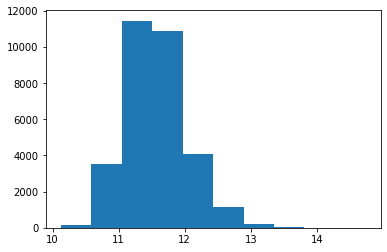

In [27]:
plt.hist(train['log_y'])

In [28]:
hoge = ['23ku','area_num','age','floor','max_floor','layout','room_num',
        'direction','facilities','contact_period']
hage = []
for h in hoge:
    hage.append(h+'_countall')

In [29]:
hage

['23ku_countall',
 'area_num_countall',
 'age_countall',
 'floor_countall',
 'max_floor_countall',
 'layout_countall',
 'room_num_countall',
 'direction_countall',
 'facilities_countall',
 'contact_period_countall']